# Linear Algebra Review for Dimensionality Reduction

Content from- An Introduction to Linear Algebra by Strang

In [15]:
!pip install numpy
!pip install matplotlib

In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt

## Vectors & Inner Products

* Vector spaces

* Dot product

* Norms and distances

* Angles between vectors

Consider $2$ vectors $\mathbf{a}, \mathbf{b} \in \mathbb{R}^2$

a =
[1 2]
b =
[3 4]
shape of a
(2,)


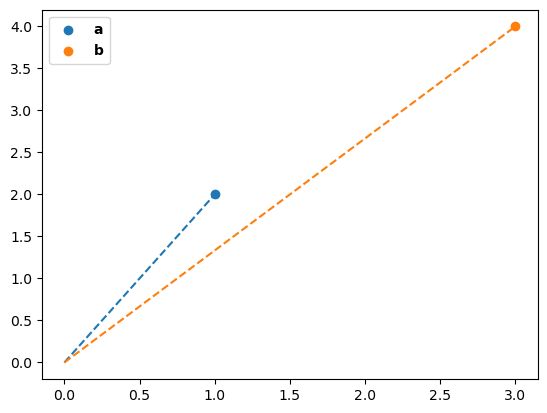

In [2]:
# Two vectors in R^2
a = np.array([1, 2])
b = np.array([3, 4])

plt.plot([0,a[0]], [0,a[1]], ls='dashed')
plt.plot([0,b[0]], [0,b[1]], ls='dashed')
plt.scatter(a[0], a[1], color='tab:blue', label=r'$\mathbf{a}$')
plt.scatter(b[0], b[1], color='tab:orange', label=r'$\mathbf{b}$')
plt.legend()

print('a =')
print(a)
print('b =')
print(b)

print(r'shape of a')
print(a.shape)


Their dot product is $\mathbf{a}^\top \mathbf{b} = 1 \cdot 3 + 2 \cdot 4$

In [3]:
dot_product = np.dot(a, b)
print(f"Dot product: {dot_product}")


Dot product: 11


The 2-norm of $\mathbf{a}$ is $\| \mathbf{a} \|_2 = \sqrt{ \mathbf{a}^\top \mathbf{a}}$.

This is the length of the blue line.

In [4]:
norm_a = np.linalg.norm(a)
print(f"Norm of a: {norm_a}")


Norm of a: 2.23606797749979


The Euclidean distance between $\mathbf{a}$ and $\mathbf{b}$ is $\|\mathbf{a} - \mathbf{b}\|_2$

In [5]:
dist_a_b = np.linalg.norm(a - b)
print(f"Distance between a and b: {dist_a_b}")

Distance between a and b: 2.8284271247461903


The angle between $\mathbf{a}$ and $\mathbf{b}$ is found using $\cos \theta(\mathbf{a},\mathbf{b}) = \frac{\mathbf{a}^\top \mathbf{b} }{\mathbf{a}^\top \mathbf{a}\mathbf{b}^\top \mathbf{b}}$

In [6]:
angle_rad = np.arccos(dot_product / (norm_a * np.linalg.norm(b)))
print(f"Angle (degrees): {np.degrees(angle_rad):.2f}")

Angle (degrees): 10.30


## Subspaces, Orthogonality, Projections

* Columns space, row space
* Orthogonal projections
* Orthonormal bases
* Projection matrices

$ \mathbf{A} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 1 & 1 \end{bmatrix}$

In [7]:
A = np.array([[1, 0], [0, 1], [1, 1]])
A

array([[1, 0],
       [0, 1],
       [1, 1]])

The **column space** of $\mathbf{A}$, denoted $\mathrm{col}(\mathbf{A})$, is the set of all $\mathbf{x} = c_1 \mathbf{a}_1 + c_2 \mathbf{a}_2$ linear combintation of the columns of $\mathbf{A}$. This is a subspace of dimension $2$ of $\mathbb{R}^3$.

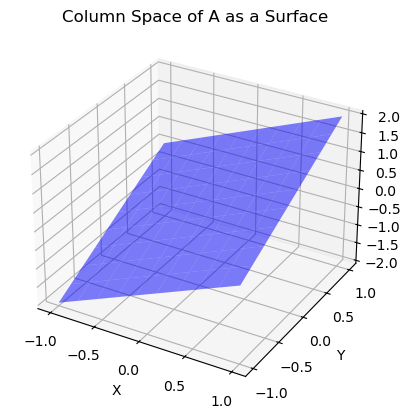

In [8]:
# Visualize the column space of A as a surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate a grid of coefficients for the linear combination of columns of A
u = np.linspace(-1, 1, 10)
v = np.linspace(-1, 1, 10)
U, V = np.meshgrid(u, v)

# Compute the points in the column space
X = U * A[0, 0] + V * A[0, 1]
Y = U * A[1, 0] + V * A[1, 1]
Z = U * A[2, 0] + V * A[2, 1]

# Plot the surface
ax.plot_surface(X, Y, Z, color='blue', alpha=0.5)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Column Space of A as a Surface')

plt.show()


The **row space** of $\mathbf{A}$ is the set of all linear combinations of the rows of $\mathbf{A}$. It represents a subspace of $\mathbb{R}^n$ (where $n$ is the number of columns of $\mathbf{A}$). In this case, since $\mathbf{A}$ has two columns, the row space is a subspace of $\mathbb{R}^2$.

In this case, it is all of $\mathbb{R}^2$



Projections are a way to map a vector onto a subspace. The projection of a vector $\mathbf{b}$ onto a subspace spanned by the columns of a matrix $\mathbf{A}$ is given by:

$$
\text{Proj}_{\text{col}(\mathbf{A})}(\mathbf{b}) = \mathbf{P} \mathbf{b}, \quad \text{where } \mathbf{P} = \mathbf{A} (\mathbf{A}^\top \mathbf{A})^{-1} \mathbf{A}^\top
$$

This operation finds the closest vector in the subspace to $\mathbf{b}$ in terms of Euclidean distance.

Here, we define the vector $\mathbf{b}$ as:

$$
\mathbf{b} = \begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix}
$$

In [9]:

b = np.array([1, 3, 2])
print('b is')
print(b)

print('the shape of b')
print(b.shape)

# Projection of b onto the column space of A
P = A @ np.linalg.inv(A.T @ A) @ A.T
proj_b = P @ b

print(f"Projection of b: {proj_b}")


proj_res = np.linalg.norm(b - proj_b)
print(f"Norm of projection residual: {proj_res}")


b is
[1 3 2]
the shape of b
(3,)
Projection of b: [0.33333333 2.33333333 2.66666667]
Norm of projection residual: 1.1547005383792517


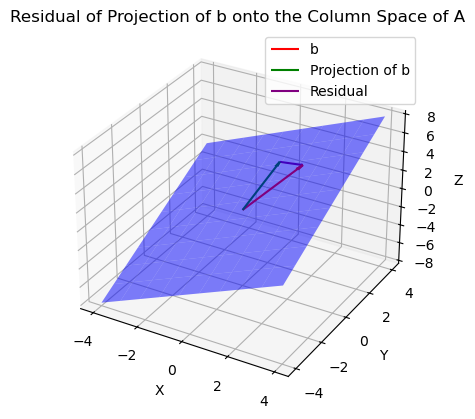

In [10]:

# Visualize the residual
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Generate a grid of coefficients for the linear combination of columns of A
u = np.linspace(-4, 4, 10)
v = np.linspace(-4, 4, 10)
U, V = np.meshgrid(u, v)
# Compute the points in the column space
X = U * A[0, 0] + V * A[0, 1]
Y = U * A[1, 0] + V * A[1, 1]
Z = U * A[2, 0] + V * A[2, 1]
# Plot the surface
ax.plot_surface(X, Y, Z, color='blue', alpha=0.5)
# Plot the original vector b
ax.quiver(0, 0, 0, b[0], b[1], b[2], color='red', label='b', arrow_length_ratio=0.1)
# Plot the projection of b
ax.quiver(0, 0, 0, proj_b[0], proj_b[1], proj_b[2], color='green', label='Projection of b', arrow_length_ratio=0.1)
# Plot the residual vector
residual = b - proj_b
ax.quiver(proj_b[0], proj_b[1], proj_b[2], residual[0], residual[1], residual[2], color='purple', label='Residual', arrow_length_ratio=0.1)
# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Residual of Projection of b onto the Column Space of A')
plt.legend()
plt.show()


Two vectors are orthogonal if their dot product is zero. For example, consider the following vectors in \(\mathbb{R}^3\):

$$
\mathbf{u} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \quad \mathbf{v} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}
$$

The dot product of \(\mathbf{u}\) and \(\mathbf{v}\) is:

$$
\mathbf{u}^\top \mathbf{v} = (1)(0) + (0)(1) = 0
$$

Since the dot product is zero, the vectors \(\mathbf{u}\) and \(\mathbf{v}\) are orthogonal. This happens because the cosine of the angle between them is zero, indicating a \(90^\circ\) angle.

The projection matrix onto the subspace spanned by \(\mathbf{u}\) and \(\mathbf{v}\) is:

$$
\mathbf{U} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix}, \quad \mathbf{P}_{uv} = \mathbf{U} (\mathbf{U}^\top \mathbf{U})^{-1} \mathbf{U}^\top
$$

Evaluating this, we get:

$$
\mathbf{P}_{uv} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix}
$$

# Matrix Decompositions

* Singular Value Decomposition 
* Eigenvalue Decomposition

### Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes a matrix $\mathbf{A}$ into three components:

$$
\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top
$$

- $\mathbf{U}$: An orthogonal matrix whose columns are the left singular vectors of $\mathbf{A}$.
- $\mathbf{\Sigma}$: A diagonal matrix containing the singular values of $\mathbf{A}$, which represent the magnitude of the principal components.
- $\mathbf{V}^\top$: The transpose of an orthogonal matrix whose rows are the right singular vectors of $\mathbf{A}$.

SVD is widely used in applications such as dimensionality reduction, image compression, and solving linear systems. It provides insights into the structure of a matrix, including its rank, range, and null space.


In [11]:
# Random 2D data
A = np.random.randn(5, 3)

# SVD
U, S, VT = np.linalg.svd(A, full_matrices=False)

print('left singular vectors')
print(U)
print('singular values')
print(S)
print('right singular vectors')
print(V.T)

left singular vectors
[[-0.50036001  0.81016633  0.02712401]
 [ 0.67825034  0.58511381  0.0122313 ]
 [-0.15720176 -0.00625417 -0.33752507]
 [-0.44063102  0.00395616 -0.40436489]
 [ 0.26598543  0.03489376 -0.84951783]]
singular values
[2.94246033 1.84299825 1.18379349]
right singular vectors
[[-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
   1.33333333  2.22222222  3.11111111  4.        ]
 [-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
   1.33333333  2.22222222  3.11111111  4.        ]
 [-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
   1.33333333  2.22222222  3.11111111  4.        ]
 [-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
   1.33333333  2.22222222  3.11111111  4.        ]
 [-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
   1.33333333  2.22222222  3.11111111  4.        ]
 [-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
   1.3333

Original matrix A:
[[-1.07575305  0.8402602   1.59211747]
 [ 2.09580291  0.85844867  0.12911692]
 [-0.54755928  0.25457938 -0.09545113]
 [-1.34951462  0.25939784  0.14740845]
 [ 0.47037477  0.85811773 -0.81877958]]
Low-rank approximation of A (k=2):
[[-1.08463278  0.864306    1.57277962]
 [ 2.09179869  0.86929188  0.12039672]
 [-0.43706194 -0.04464113  0.1451847 ]
 [-1.21713557 -0.09907707  0.4356972 ]
 [ 0.74848585  0.10500875 -0.21312257]]


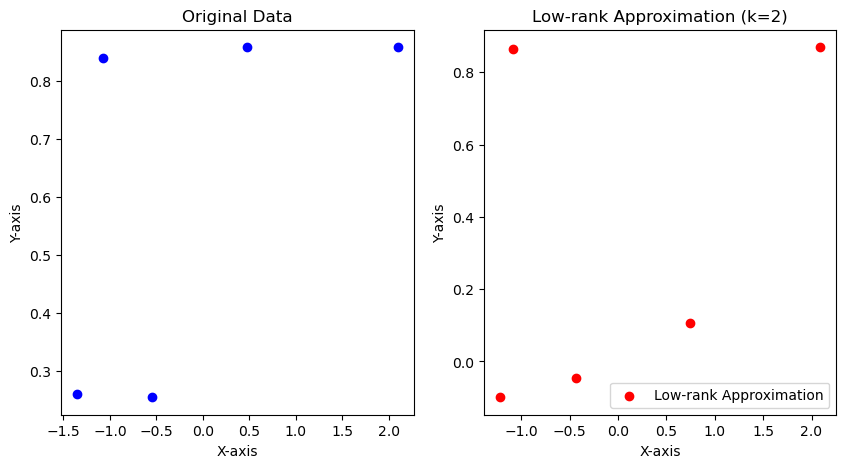

In [12]:
#Low-rank approximation
k = 2
A_k = U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]
print(f"Original matrix A:\n{A}")
print(f"Low-rank approximation of A (k={k}):\n{A_k}")
# Visualize the original and low-rank approximation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(A[:, 0], A[:, 1], color='blue', label='Original Data')
plt.title('Original Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.subplot(1, 2, 2)
plt.scatter(A_k[:, 0], A_k[:, 1], color='red', label='Low-rank Approximation')
plt.title(f'Low-rank Approximation (k={k})')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

### Deriving Eigenvalue Decomposition from SVD

The Singular Value Decomposition (SVD) of a matrix $\mathbf{A}$ is given by:

$$
\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top
$$

where:
- $\mathbf{U}$ is an orthogonal matrix ($\mathbf{U}^\top \mathbf{U} = \mathbf{I}$),
- $\mathbf{\Sigma}$ is a diagonal matrix containing the singular values of $\mathbf{A}$,
- $\mathbf{V}$ is an orthogonal matrix ($\mathbf{V}^\top \mathbf{V} = \mathbf{I}$).

#### Eigenvalue Decomposition of $\mathbf{C} = \mathbf{A}^\top \mathbf{A}$
1. Compute $\mathbf{A}^\top \mathbf{A}$:
    $$
    \mathbf{A}^\top \mathbf{A} = (\mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top)^\top (\mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top)
    $$

2. Simplify using properties of orthogonal matrices:
    $$
    \mathbf{A}^\top \mathbf{A} = \mathbf{V} \mathbf{\Sigma}^\top \mathbf{U}^\top \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top
    $$

    Since $\mathbf{U}^\top \mathbf{U} = \mathbf{I}$:
    $$
    \mathbf{A}^\top \mathbf{A} = \mathbf{V} \mathbf{\Sigma}^\top \mathbf{\Sigma} \mathbf{V}^\top
    $$

3. Observe that $\mathbf{\Sigma}^\top \mathbf{\Sigma}$ is a diagonal matrix containing the squared singular values of $\mathbf{A}$. Let $\mathbf{\Lambda} = \mathbf{\Sigma}^\top \mathbf{\Sigma}$:
    $$
    \mathbf{C}= \mathbf{A}^\top \mathbf{A} = \mathbf{V} \mathbf{\Lambda} \mathbf{V}^\top
    $$

    This is the eigenvalue decomposition of $\mathbf{A}^\top \mathbf{A}$, where:
    - $\mathbf{V}$ contains the eigenvectors of $\mathbf{A}^\top \mathbf{A}$,
    - $\mathbf{\Lambda}$ contains the eigenvalues of $\mathbf{A}^\top \mathbf{A}$.

In [13]:



# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(A.T @ A)

# Print the results
print("Matrix:")
print(A.T @ A)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)



Matrix:
[[ 7.89189774  0.80940521 -1.97391956]
 [ 0.80940521  2.31143525  0.75996147]
 [-1.97391956  0.75996147  3.25274939]]

Eigenvalues:
[8.65807279 1.40136702 3.39664257]

Eigenvectors:
[[-0.93988386 -0.27654758  0.20034914]
 [-0.08011603  0.74887508  0.6578507 ]
 [ 0.33196349 -0.60225207  0.72601149]]


##### Eigenvalue Decomposition \& Optimization

Eigenvalue decomposition as an iterative optimization. The $i$th eigenvector is the minimizer of
$$
\lambda_i = \max_{\mathbf{v}^\top \mathbf{v}_{j}=0 \: \: \forall j < i} \frac{\mathbf{v}^\top \mathbf{C} \mathbf{v}}{\mathbf{v}^\top \mathbf{v}}
$$

Eigenvalue decomposition as an optimization with orthogonality constraints:
$$
\mathbf{V} = \argmax_{\mathbf{W}^\top \mathbf{W} = \mathbf{I}} \mathrm{tr}(\mathbf{W}^\top \mathbf{C} \mathbf{W})
$$

$$
\mathrm{tr}(\boldsymbol{\Lambda}) = \max_{\mathbf{W}^\top \mathbf{W} = \mathbf{I}} \mathrm{tr}(\mathbf{W}^\top \mathbf{C} \mathbf{W})
$$

Using $\mathbf{M} = \mathbf{A}^\top \mathbf{A}$, we have the new objective

$$
\mathbf{V} = \argmin_{\mathbf{W}^\top \mathbf{W} = \mathbf{I}} \| \mathbf{A} - \mathbf{A} \mathbf{W} \mathbf{W}^\top\|_F^2
$$






#### Generalized Eigenvalue Decomposition

Recall the eigenvalue decomposition outputs eigenvectors $\mathbf{v}$ and eigenvalues $\lambda$ that solve $ \mathbf{C} \mathbf{v} = \lambda \mathbf{v}$. 

The generalized eigenvalue decomposition uses two square matrices $\mathbf{C}_A, \mathbf{C}_B$:
$$
\mathbf{C}_A \mathbf{w} = \lambda \mathbf{C}_B \mathbf{w}
$$

**Optimization**
$$
\lambda_i = \max_{\mathbf{w}^\top \mathbf{w}_{j}=0 \: \: \forall j < i} \frac{\mathbf{w}^\top \mathbf{C}_A \mathbf{w}}{\mathbf{w}^\top \mathbf{C}_B \mathbf{w}}
$$


**Approximation**
Eigenvalue decomposition of $\mathbf{C}_B^{-1} \mathbf{C}_A$.

*CAUTION* need to compute a matrix inverse.

One way is pseudoinverse 
1. Compute SVD $\mathbf{C}_B = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^\top$
2. Compute pseudoiverse $\mathbf{C}_B^{-1} \approx  \mathbf{C}_B^\dagger = \mathbf{V} \boldsymbol{\Sigma}^{-1} \mathbf{U}^\top$.

*Condition number* $\kappa(\mathbf{C}_B) = \sigma_{\mathrm{max}}/\sigma_{\mathrm{min}}$. If big, psudoinverse is unstable.

**Further Reading**

A resource for using SVD to find generalized eigenvalue decomposition: https://www.cis.rit.edu/~rlepci/Erho/Derek/Useful_References/Linear%20Discriminant%20Analysis/Melzer_simul_diag.pdf

In [14]:
# Define two symmetric matrices C_A and C_B
C_A = np.array([[6, 2], [2, 3]])
C_B = np.array([[4, 1], [1, 2]])

# Check the condition number of C_B
cond_number = np.linalg.cond(C_B)
print(f"Condition number of C_B: {cond_number}")

# Ensure C_B is well-conditioned before inverting
if cond_number > 1e10:
    raise ValueError("Matrix C_B is poorly conditioned and may lead to numerical instability.")

# Perform generalized eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.pinv(C_B) @ C_A)

# Print the results
print("Generalized Eigenvalues:")
print(eigenvalues)
print("\nGeneralized Eigenvectors:")
print(eigenvectors)

Condition number of C_B: 2.783611624891225
Generalized Eigenvalues:
[1.63060194 1.22654092]

Generalized Eigenvectors:
[[ 0.57735027 -0.57735027]
 [ 0.81649658  0.81649658]]


## Summary

### 1. Vectors & Inner Products

- **Dot product**: $ \mathbf{a}^\top \mathbf{b} = \sum_i a_i b_i $
- **Norm**: $ \|\mathbf{a}\| = \sqrt{\mathbf{a}^\top \mathbf{a}} $
- **Distance**: $ \|\mathbf{a} - \mathbf{b}\| $
- **Angle**: $ \cos \theta = \frac{\mathbf{a}^\top \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|} $

---

### 2. Subspaces & Projections

- **Span**: Set of all linear combinations
- **Projection matrix**: $ P = A(A^\top A)^{-1}A^\top $
- **Orthonormal basis**: $ Q^\top Q = I $
- **Orthogonal projection**: $ \hat{\mathbf{b}} = P \mathbf{b} $

---

### 3. Eigenvalues & Eigenvectors

- $ A \mathbf{v} = \lambda \mathbf{v} $
- Diagonalization: $ A = Q \Lambda Q^\top $ (if $ A $ is symmetric)
- Eigenvectors show invariant directions

---

### 4. Singular Value Decomposition (SVD)

- $ A = U \Sigma V^\top $
- $ U, V $ orthogonal; $ \Sigma $ diagonal
- Best rank-$ k $ approx: $ A_k = U_k \Sigma_k V_k^\top $

---

### Summary Table

| Concept     | Formula                                   |
|-------------|--------------------------------------------|
| Dot product | $ \mathbf{a}^\top \mathbf{b} $             |
| Norm        | $ \|\mathbf{a}\| $                         |
| Projection  | $ A(A^\top A)^{-1}A^\top $                 |
| Eigen       | $ A = Q \Lambda Q^\top $                  |
| SVD         | $ A = U \Sigma V^\top $                   |